### Imports

In [55]:
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Load data files


In [2]:
classes_trainable = pd.read_csv(r'\\ger\ec\proj\ha\RSG\FacePublicDatasets\OpenImages\InclusiveChallenge\docs\classes-trainable.csv')
class_descriptions = pd.read_csv(r'\\ger\ec\proj\ha\RSG\FacePublicDatasets\OpenImages\InclusiveChallenge\docs\class-descriptions.csv')
train_human_labels = pd.read_csv(r'\\ger\ec\proj\ha\RSG\FacePublicDatasets\OpenImages\InclusiveChallenge\docs\train_human_labels.csv')
train_machine_labels = pd.read_csv(r'\\ger\ec\proj\ha\RSG\FacePublicDatasets\OpenImages\InclusiveChallenge\docs\train_machine_labels.csv')
train_bounding_boxes = pd.read_csv(r'\\ger\ec\proj\ha\RSG\FacePublicDatasets\OpenImages\InclusiveChallenge\docs\train_bounding_boxes.csv')

### Analyze

In [4]:
print('len(classes_trainable) = {}\n'.format(len(classes_trainable)))
print(classes_trainable.head())

len(classes_trainable) = 7178

    label_code
0  /m/0108_09c
1    /m/010dmf
2    /m/010jjr
3    /m/010l12
4  /m/010lq47b


In [11]:
print('len(class description) = {}\n'.format(len(class_descriptions)))
print(class_descriptions.head())

len(class description) = 19987

    label_code          description
0  /m/0100nhbf     Sprenger's tulip
1  /m/0104x9kv             Vinegret
2  /m/0105jzwx            Dabu-dabu
3  /m/0105ld7g  Pistachio ice cream
4  /m/0105lxy5                 Woku


In [11]:
print('len(train_human_labels) = {}'.format(len(train_human_labels)))
print('len(train_machine_labels) = {}'.format(len(train_machine_labels)))
print('\n')
print(train_human_labels.head())
print('\n')
print(train_machine_labels.head())

len(train_human_labels) = 8036466


len(train_machine_labels) = 15259186


            ImageID                    Source  LabelName  Confidence
0  000002b66c9c498e  crowdsource-verification  /m/01kcnl           1
1  000002b66c9c498e              verification   /m/012mj           1
2  000002b66c9c498e              verification  /m/012yh1           1
3  000002b66c9c498e              verification  /m/014sv8           1
4  000002b66c9c498e              verification  /m/016c68           1


            ImageID   Source   LabelName  Confidence
0  000002b66c9c498e  machine    /m/05_4_         0.7
1  000002b66c9c498e  machine    /m/0krfg         0.7
2  000002b66c9c498e  machine   /m/01kcnl         0.5
3  000002b97e5471a0  machine  /m/05_5t0l         0.9
4  000002b97e5471a0  machine    /m/0cgh4         0.8


### Take annotations only for trainable labels

In [73]:
train_human_labels_trainable = train_human_labels[train_human_labels['LabelName'].isin(classes_trainable['label_code'])]
train_machine_labels_trainable = train_machine_labels[train_machine_labels['LabelName'].isin(classes_trainable['label_code'])]

### Labels distribution

In [12]:
train_human_labels_values_count = train_human_labels_trainable['LabelName'].value_counts()
print(train_human_labels_values_count.head())

/m/01g317    807090
/m/09j2d     610840
/m/0dzct     331942
/m/07j7r     315026
/m/05s2s     266978
Name: LabelName, dtype: int64


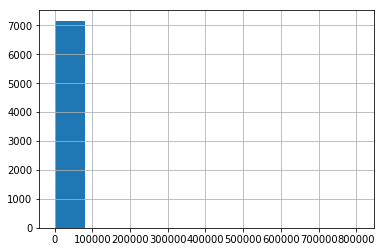

In [42]:
train_human_labels_values_count.hist()

Labels with over 100K instances: 11


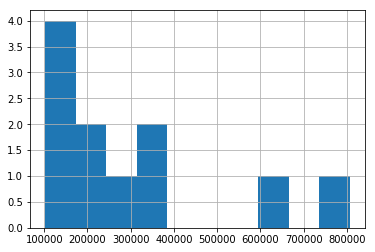

In [63]:
train_human_labels_values_count_more_100k = train_human_labels_values_count[train_human_labels_values_count >= 100000]
print('Labels with over 100K instances: {}'.format(len(train_human_labels_values_count_more_100k)))
train_human_labels_values_count_more_100k.hist()

Labels with between 10K and 100K instances: 83


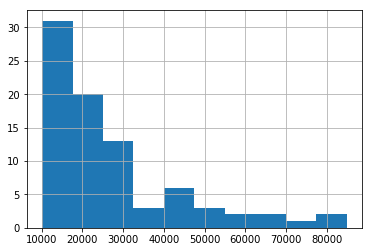

In [64]:
train_human_labels_values_in_10K_100k = train_human_labels_values_count[(train_human_labels_values_count >= 10000) & (train_human_labels_values_count < 100000)]
print('Labels with between 10K and 100K instances: {}'.format(len(train_human_labels_values_in_10K_100k)))
train_human_labels_values_in_10K_100k.hist()

Labels with between 1K and 10K instances: 242


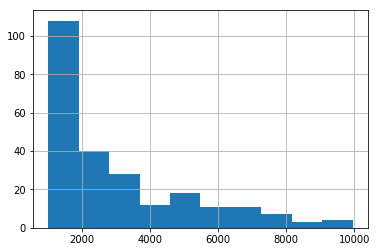

In [65]:
train_human_labels_values_count_in_1K_10K = train_human_labels_values_count[(train_human_labels_values_count >= 1000) & (train_human_labels_values_count < 10000)]
print('Labels with between 1K and 10K instances: {}'.format(len(train_human_labels_values_count_in_1K_10K)))
train_human_labels_values_count_in_1K_10K.hist()

Labels with between 100 and 1K instances: 2755


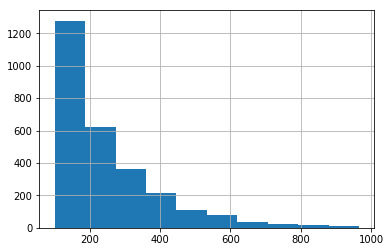

In [66]:
train_human_labels_values_count_in_100_1K = train_human_labels_values_count[(train_human_labels_values_count >= 100) & (train_human_labels_values_count < 1000)]
print('Labels with between 100 and 1K instances: {}'.format(len(train_human_labels_values_count_in_100_1K)))
train_human_labels_values_count_in_100_1K.hist()

Labels with between 50 and 100 instances: 2079


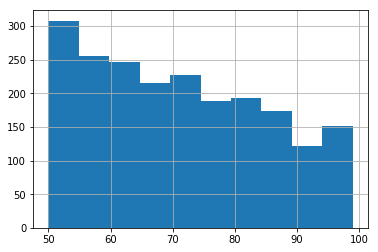

In [67]:
train_human_labels_values_count_in_50_100 = train_human_labels_values_count[(train_human_labels_values_count >= 50) & (train_human_labels_values_count < 100)]
print('Labels with between 50 and 100 instances: {}'.format(len(train_human_labels_values_count_in_50_100)))
train_human_labels_values_count_in_50_100.hist()

Labels with less 50 instances: 2002


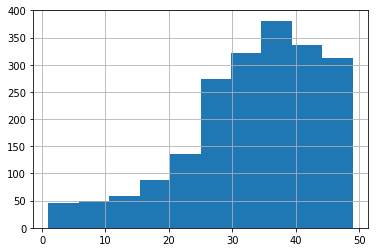

In [68]:
train_human_labels_values_count_less_50 = train_human_labels_values_count[(train_human_labels_values_count < 50)]
print('Labels with less 50 instances: {}'.format(len(train_human_labels_values_count_less_50)))
train_human_labels_values_count_less_50.hist()

### Create train files for label ranges

In [69]:
def save_descriptions_file(series, file_name):
    series_class_descriptions = class_descriptions.merge(series.to_frame(), left_on='label_code', right_index=True, how='inner')
    series_class_descriptions.drop(columns=['LabelName'], inplace=True)
    print(series_class_descriptions)
    series_class_descriptions.to_csv(os.path.join(r'\\ger\ec\proj\ha\RSG\FacePublicDatasets\OpenImages\InclusiveChallenge\docs', file_name),
                                     index=False, header=False)

In [70]:
def save_train_files(series, file_name):
    series_train_human_labels_trainable = train_human_labels_trainable[train_human_labels_trainable['LabelName'].isin(series.index)]
    print('len(file_name) = {}'.format(len(series_train_human_labels_trainable)))
    series_train_human_labels_trainable.to_csv(os.path.join(r'\\ger\ec\proj\ha\RSG\FacePublicDatasets\OpenImages\InclusiveChallenge\docs', file_name), index=False)

In [75]:
def create_train_files(series, series_name):
    save_descriptions_file(series, 'class-descriptions_{}.csv'.format(series_name))
    save_train_files(series, 'train_human_labels_trainable_{}.csv'.format(series_name))

In [77]:
create_train_files(train_human_labels_values_count_more_100k, 'more_100k')
create_train_files(train_human_labels_values_in_10K_100k, 'in_10K_100k')
create_train_files(train_human_labels_values_count_in_1K_10K, 'in_1K_10K')
create_train_files(train_human_labels_values_count_in_100_1K, 'in_100_1K')
create_train_files(train_human_labels_values_count_in_50_100, 'in_50_100')
create_train_files(train_human_labels_values_count_less_50, 'less_50')

       label_code    description
198     /m/013_1c         Statue
216     /m/0138tl            Toy
311     /m/014sv8      Human eye
390      /m/015p6           Bird
572     /m/017ftj     Sunglasses
748      /m/0199g        Bicycle
769      /m/019jd           Boat
779     /m/019nj4          Smile
865     /m/01bgsw        Toddler
868     /m/01_bhs      Fast food
870      /m/01bjv            Bus
889     /m/01bqk0  Bicycle wheel
892     /m/01bqvp            Sky
947     /m/01c648         Laptop
1026    /m/01d40f          Dress
1151    /m/01fdzj          Tower
1441    /m/01jddz        Concert
1678     /m/01lrl      Carnivore
1706     /m/01m3v       Computer
1748    /m/01mzpv          Chair
1770    /m/01n5jq         Poster
2113    /m/01rzcn     Watercraft
2442    /m/01ww8y          Snack
2560    /m/01xyhv           Suit
2624     /m/01yrx            Cat
2846     /m/0215n        Cartoon
3510     /m/026bk          Dance
3745     /m/0270h        Dessert
3754     /m/0271t          Drink
4127   /m/

len(file_name) = 2224091


       label_code                  description
44      /m/011k07                     Tortoise
80      /m/01226z                     Football
139     /m/012n4x                  Firefighter
159     /m/012v4j                       Hiking
196     /m/0130jx                         Sink
251     /m/013xlm                      Tractor
283      /m/0149r                     Aquarium
294     /m/014j1m                        Apple
313     /m/014trl                    Cosmetics
321     /m/014y4n                       Paddle
356      /m/01599                         Beer
369     /m/015h_t                  Human beard
394     /m/015qff                Traffic light
440     /m/0167gd                         Doll
483     /m/016m2d                        Skull
533     /m/0174n1                        Glove
666      /m/018jz                     Baseball
676     /m/018p4k                         Cart
698      /m/018w8                   Basketball
703      /m/018xm                         Ball
758     /m/01

len(file_name) = 729943


        label_code                description
10       /m/010jjr             Amusement park
13     /m/010ls_cv           Sandwich Cookies
17       /m/01_12b               Granny smith
24        /m/0117z                   Air show
26     /m/0118ms9c              Reflex camera
27     /m/0118n_9r               Water bottle
31     /m/0119x1zy                        Bun
37       /m/011_dp              Membranophone
38       /m/011_f4          String instrument
39       /m/011_g9            Wind instrument
41       /m/011jbn                      Gourd
47       /m/011l78                       Team
55       /m/011_my                  Idiophone
58        /m/011s0                Advertising
67       /m/011y23              Stained glass
68       /m/011yvr                 Plantation
73       /m/012074                     Magpie
74       /m/0120dh                 Sea turtle
76       /m/0121tl      Electronic instrument
78       /m/01224j                     Hearth
84       /m/01240d                

len(file_name) = 679850


        label_code           description
9        /m/010dmf        Isle of man tt
30     /m/01195jk4            Jean short
35     /m/011bc8hg              Camomile
54        /m/011lx         Acrylic paint
62       /m/011xdj              Meringue
71       /m/012047             Narcissus
75       /m/0121d8        Historic house
81       /m/0122b5             Newsprint
83       /m/0123gb                 Egret
89       /m/0125ny         Lake district
94       /m/012757      Fluorescent lamp
100      /m/0129f4     Chemical compound
116      /m/012h24                Comics
124      /m/012k6q                Ocicat
132      /m/012m47      Chinese new year
148      /m/012q_x           Coast guard
161      /m/012v8q                   Bog
162      /m/012vt9              Flautist
165      /m/012vzz       Plant pathology
169      /m/012ww9   Archaeological site
188      /m/012y1_                  Soba
191      /m/012ysf               Syringe
211    /m/0134zdgk      Multigrain bread
218      /m/0139

len(file_name) = 147765


        label_code               description
7      /m/0108_09c          Summer snowflake
11       /m/010l12            Roller coaster
12     /m/010lq47b                 Witch hat
16        /m/01127          Air conditioning
21     /m/0117_25k            Saffron crocus
32     /m/0119x27p            Cocker spaniel
36     /m/011bfkzx                  Beaglier
42       /m/011jng                     Fiber
43       /m/011jxn                   Lasagne
49       /m/011_lb                     Vespa
50     /m/011lf0ff                Mardi Gras
70       /m/012015                Stone tool
72       /m/01205h                    Ferret
87       /m/0124h9                Poinsettia
108      /m/012ckm                   Bonfire
111      /m/012d_c                Blacksmith
117      /m/012hvb                    Corset
125    /m/012kcmdn                   Pyronia
137      /m/012mqx                   Iceberg
149      /m/012qyb                    Barber
151      /m/012rq8                  Treasure
171      /

len(file_name) = 66544


### Top labels (10/100)

In [ ]:
top_10_labels = train_human_labels_values_count.head(10)
top_100_labels = train_human_labels_values_count.head(100)

### Class descriptions for top labels

In [100]:
class_descriptions_top_10 = class_descriptions.merge(top_10_labels.to_frame(), left_on='label_code', right_index=True, how='inner')
class_descriptions_top_10.drop(columns=['LabelName'], inplace=True)
print(class_descriptions_top_10)
class_descriptions_top_10.to_csv(r'\\ger\ec\proj\ha\RSG\FacePublicDatasets\OpenImages\InclusiveChallenge\docs\class-descriptions_top_10.csv', index=False, header=False)

      label_code   description
1206   /m/01g317        Person
1924   /m/01prls  Land vehicle
11909   /m/05s2s         Plant
13801   /m/07j7r          Tree
14184   /m/07yv9       Vehicle
15243   /m/09j2d      Clothing
15245   /m/09j5n      Footwear
16452   /m/0cgh4      Building
17402   /m/0dzct    Human face
19338    /m/0jbk        Animal


In [101]:
class_descriptions_top_100 = class_descriptions.merge(top_100_labels.to_frame(), left_on='label_code', right_index=True, how='inner')
class_descriptions_top_100.drop(columns=['LabelName'], inplace=True)
print('len(class_descriptions_top_100) = {}'.format(len(class_descriptions_top_100)))
class_descriptions_top_100.to_csv(r'\\ger\ec\proj\ha\RSG\FacePublicDatasets\OpenImages\InclusiveChallenge\docs\class-descriptions_top_100.csv', index=False, header=False)

len(class_descriptions_top_100) = 100


### Create files with only trainable labels

In [102]:
print('len(train_human_labels_trainable) = {}'.format(len(train_human_labels_trainable)))
print('len(train_machine_labels_trainable) = {}'.format(len(train_machine_labels_trainable)))

len(train_human_labels_trainable) = 7117742
len(train_machine_labels_trainable) = 13409172


In [103]:
train_human_labels_trainable.to_csv(r'\\ger\ec\proj\ha\RSG\FacePublicDatasets\OpenImages\InclusiveChallenge\docs\train_human_labels_trainable.csv', index=False)
train_machine_labels_trainable.to_csv(r'\\ger\ec\proj\ha\RSG\FacePublicDatasets\OpenImages\InclusiveChallenge\docs\train_machine_labels_trainable.csv', index=False)

### Create files with top trainable lables (10/100)

In [105]:
train_human_labels_trainable_top_10 = train_human_labels_trainable[train_human_labels_trainable['LabelName'].isin(top_10_labels.index)]
print('len(train_human_labels_trainable_top_10) = {}'.format(len(train_human_labels_trainable_top_10)))

len(train_human_labels_trainable_top_10) = 3166864


In [107]:
train_human_labels_trainable_top_100 = train_human_labels_trainable[train_human_labels_trainable['LabelName'].isin(top_100_labels.index)]
print('len(train_human_labels_trainable_top_100) = {}'.format(len(train_human_labels_trainable_top_100)))

len(train_human_labels_trainable_top_10) = 5549576


In [108]:
train_human_labels_trainable_top_10.to_csv(r'\\ger\ec\proj\ha\RSG\FacePublicDatasets\OpenImages\InclusiveChallenge\docs\train_human_labels_trainable_top_10.csv', index=False)
train_human_labels_trainable_top_100.to_csv(r'\\ger\ec\proj\ha\RSG\FacePublicDatasets\OpenImages\InclusiveChallenge\docs\train_human_labels_trainable_top_100.csv', index=False)